In [1]:
#import important libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
from tensorflow import keras
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix 
import pickle
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset from pickled files
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("W.pickle","rb")
W = pickle.load(pickle_in)
W=np.asarray(W)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

In [3]:
#split into train and test datasets
X_train,X_test,W_train,W_test,y_train,y_test=train_test_split(X,W,y,train_size=0.8,test_size=0.2,random_state=123)
print(X_test.shape)
print(W_test.shape)
print(y_test.shape)

(1657, 64, 64, 1)
(1657,)
(1657, 5)


In [4]:
from tensorflow.keras.utils import plot_model
#from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import ModelCheckpoint

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)       3328      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)         

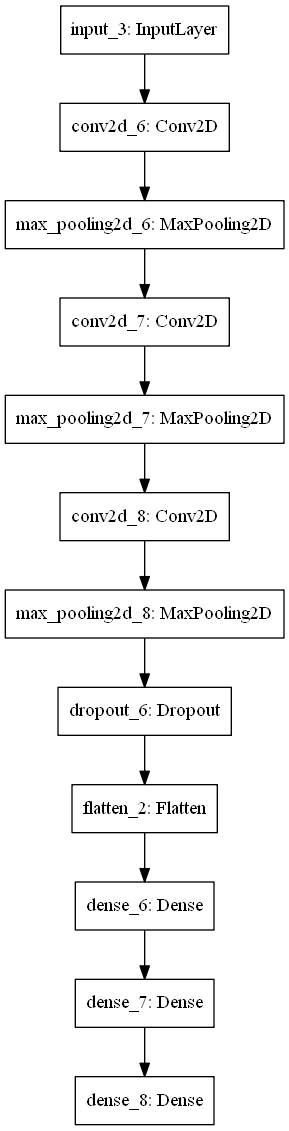

In [10]:

visible1 = Input(shape=(64,64,1))
#visible1 = Input(shape=(100,100,1))
# first feature extractor

conv1 = Conv2D(128, kernel_size=(5,5), activation='relu')(visible1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
dropout1=Dropout(0.3)(pool1)

conv2 = Conv2D(64, kernel_size=(3,3), activation='relu')(dropout1)
#conv2 = Conv2D(64, kernel_size=(3,3), activation='relu')(conv1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
dropout2=Dropout(0.3)(pool2)

conv3 = Conv2D(64, kernel_size=(3,3), activation='relu')(dropout2)
#conv3 = Conv2D(64, kernel_size=(1,1), activation='relu')(conv2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
dropout3=Dropout(0.2)(pool3)


flat1 = Flatten()(dropout3)

hidden1 = Dense(64, activation='relu')(flat1)
hidden2 = Dense(16, activation='relu')(hidden1)
output = Dense(5, activation='softmax')(hidden2)


model = Model(inputs=(visible1), outputs=output)

print(model.summary())
plot_model(model, to_file='convolutional_neural_network.png')

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )

In [12]:
import time
start = time.perf_counter()
print(y_train.shape)

history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          validation_split=0.1,
          callbacks=None,class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6626, 5)
Epoch 1/20
94/94 [==============================] - 59s 625ms/step - loss: 1.7559 - accuracy: 0.4798 - val_loss: 1.1804 - val_accuracy: 0.5852
Epoch 2/20
94/94 [==============================] - 37s 389ms/step - loss: 1.1925 - accuracy: 0.5700 - val_loss: 1.1815 - val_accuracy: 0.5551
Epoch 3/20
94/94 [==============================] - 38s 400ms/step - loss: 0.9264 - accuracy: 0.6933 - val_loss: 0.6473 - val_accuracy: 0.7707
Epoch 4/20
94/94 [==============================] - 37s 397ms/step - loss: 0.5816 - accuracy: 0.7981 - val_loss: 0.5584 - val_accuracy: 0.7692
Epoch 5/20
94/94 [==============================] - 37s 393ms/step - loss: 0.4335 - accuracy: 0.8226 - val_loss: 0.6287 - val_accuracy: 0.7888
Epoch 6/20
94/94 [==============================] - 37s 395ms/step - loss: 0.3568 - accuracy: 0.8570 - val_loss: 0.3564 - val_accuracy: 0.8899
Epoch 7/20
94/94 [==============================] - 39s 415ms/step - loss: 0.3021 - accuracy: 0.8893 - val_loss: 0.3615 - val_accura

In [16]:
score = model.evaluate(X_train, y_train, verbose=1)

208/208 [==============================] - 9s 46ms/step - loss: 0.0744 - accuracy: 0.9774


In [17]:
print(score)

[0.0743958130478859, 0.9773619174957275]


In [18]:
score = model.evaluate(X_test, y_test, verbose=1)

52/52 [==============================] - 2s 46ms/step - loss: 0.4006 - accuracy: 0.9089


In [19]:
print(score)

[0.40064120292663574, 0.9088714718818665]


In [20]:
import tensorflow.math as tfm
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api.model")
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api_no_rotation.model")


#print(model.summary)
#y_pred=model.predict_classes(X_test)
print(model.predict(X_test))
print(model.predict((X_test))[1][1])
y_pred=np.argmax(model.predict((X_test)), axis=-1)


#
classes=[0,1,2,3,4]
#classes=[0,1,2,3,4]
a=np.zeros(len(y_test)).astype(int)
#b=np.zeros(len(y_train)).astype(int)
#print(a)
#print(len(y_test))
for i in range(0,len(y_test)):
    a[i]=np.where(y_test[i]==1)[0][0]
print(a)
#for j in range(0,len(y_train)):
#    b[i]=np.where(y_train[j]==1)[0][0]

#print(b)
con_mat = tfm.confusion_matrix(labels=a, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

#con_mat_1 = tfm.confusion_matrix(labels=b, predictions=y_pred).numpy()
#con_mat_norm_1 = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
#con_mat_df_1 = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

[[1.1416553e-09 2.3283319e-06 4.4978594e-09 9.9999750e-01 8.5314539e-08]
 [6.5685413e-07 1.3823029e-08 3.7678180e-07 1.4579583e-05 9.9998438e-01]
 [2.6542031e-07 2.5274046e-06 5.5460276e-07 8.1430763e-08 9.9999654e-01]
 ...
 [1.8689647e-08 6.3120892e-06 3.8101620e-04 9.9956101e-01 5.1631414e-05]
 [2.8563368e-10 7.1201192e-08 1.5894808e-11 9.9999976e-01 1.4226305e-07]
 [6.9005978e-03 3.2233003e-01 9.5767122e-05 4.1075026e-08 6.7067355e-01]]
1.3823029e-08
[3 4 4 ... 3 3 4]


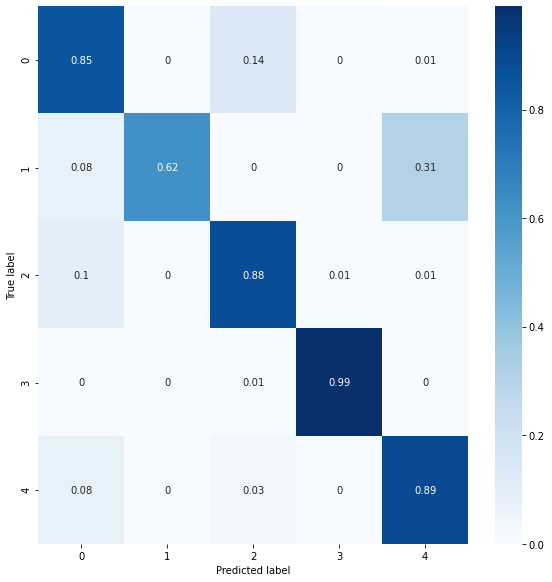

[0.40064120292663574, 0.9088714718818665]


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
score = model.evaluate((X_test), y_test, verbose=0)
#score = model.evaluate((X_test), y_test, verbose=0)
print(score)